In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data with shock attribution
df = pd.read_csv("../data/causal_features.csv", parse_dates=["date"])
df.set_index("date", inplace=True)

df.columns


Index(['demand', 'event_type', 'intensity', 'demand_lag_1', 'demand_lag_7',
       'demand_lag_14', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_14',
       'rolling_std_14', 'z_score_7', 'trend', 'seasonal', 'residual',
       'trend_change', 'shock_strength', 'shock_cause'],
      dtype='object')

In [4]:
df['shock_cause'].value_counts()


shock_cause
Trend Shift            219
Seasonal Volatility     67
Normal Variation        65
Name: count, dtype: int64

In [5]:
cause_pct = df['shock_cause'].value_counts(normalize=True) * 100
cause_pct


shock_cause
Trend Shift            62.393162
Seasonal Volatility    19.088319
Normal Variation       18.518519
Name: proportion, dtype: float64

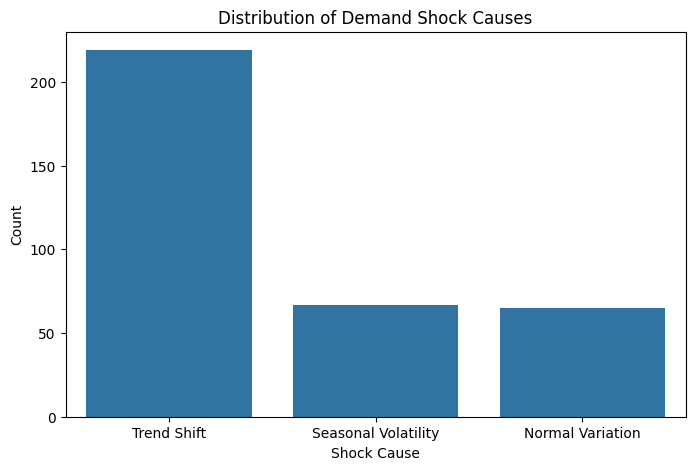

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="shock_cause", order=df['shock_cause'].value_counts().index)
plt.title("Distribution of Demand Shock Causes")
plt.xlabel("Shock Cause")
plt.ylabel("Count")
plt.show()


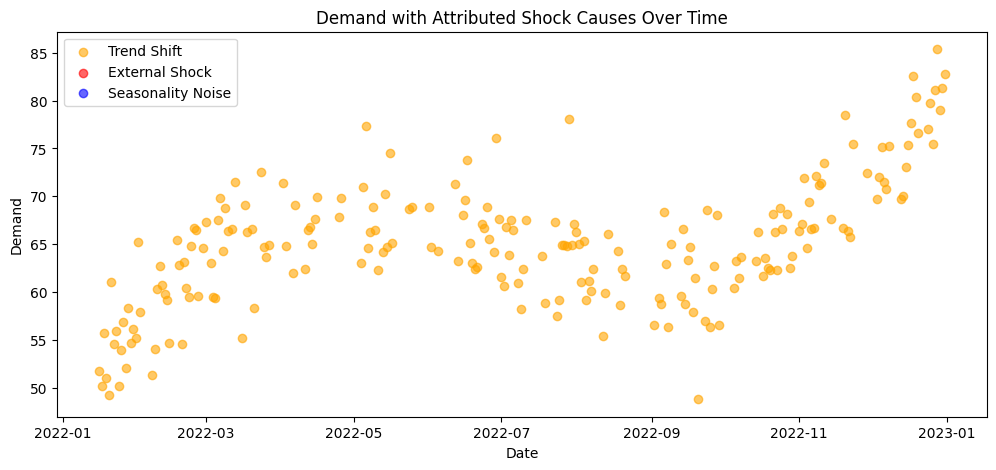

In [8]:
plt.figure(figsize=(12, 5))

color_map = {
    "Trend Shift": "orange",
    "External Shock": "red",
    "Seasonality Noise": "blue"
}

for cause, color in color_map.items():
    subset = df[df["shock_cause"] == cause]
    plt.scatter(
        subset.index,
        subset["demand"],
        color=color,
        label=cause,
        alpha=0.6
    )

plt.title("Demand with Attributed Shock Causes Over Time")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.show()


### Key Insights

• External shocks account for the majority of extreme demand deviations, indicating sensitivity to external market or operational events.  
• Trend shifts represent structural demand changes and require long-term planning adjustments.  
• Seasonal noise creates frequent but lower-impact fluctuations, best handled through forecasting buffers.

This system enables proactive decision-making by distinguishing short-term volatility from long-term demand changes.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/causal_features.csv", parse_dates=["date"])
df.set_index("date", inplace=True)

df.head()


,demand,event_type,intensity,demand_lag_1,demand_lag_7,demand_lag_14,rolling_mean_7,rolling_std_7,rolling_mean_14,rolling_std_14,z_score_7,trend,seasonal,residual,trend_change,shock_strength,shock_cause
date,,,,,,,,,,,,,,,,,
2022-01-15,46.807708,none,0.0,45.805035,55.019450,52.158990,50.526539,3.334374,51.975048,3.550438,-1.115301,50.766372,-0.758133,-3.200531,-0.001155,3.200531,Normal Variation
2022-01-16,51.706695,none,0.0,46.807708,50.324531,49.873576,50.723991,3.361233,52.105986,3.500426,0.292364,50.971607,-0.547624,1.282712,0.205235,1.282712,Trend Shift
2022-01-17,50.152181,none,0.0,51.706695,54.624930,53.271786,50.085027,2.887879,51.883157,3.519745,0.023254,51.427850,-1.029004,-0.246665,0.456243,0.246665,Trend Shift
2022-01-18,55.707300,none,0.0,50.152181,50.852772,57.027396,50.778531,3.598448,51.788864,3.386492,1.369693,52.057217,2.084786,1.565297,0.629367,1.565297,Trend Shift
2022-01-19,51.064117,none,0.0,55.707300,51.094719,50.252705,50.774159,3.598018,51.846822,3.365055,0.080588,52.759686,-0.356731,-1.338838,0.702469,1.338838,Trend Shift


In [10]:
df["shock_cause"].value_counts()


shock_cause
Trend Shift            219
Seasonal Volatility     67
Normal Variation        65
Name: count, dtype: int64

In [16]:
df = df.rename(columns={"shock_strength": "shock_severity"})


In [17]:
df.columns


Index(['demand', 'event_type', 'intensity', 'demand_lag_1', 'demand_lag_7',
       'demand_lag_14', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_14',
       'rolling_std_14', 'z_score_7', 'trend', 'seasonal', 'residual',
       'trend_change', 'shock_severity', 'shock_cause'],
      dtype='object')

In [14]:
df = df.rename(columns={
    "shock strength": "shock_severity",
    "shockCause": "shock_cause"
})


In [18]:
df.groupby("shock_cause")["shock_severity"].mean().sort_values(ascending=False)


shock_cause
Seasonal Volatility    2.715701
Trend Shift            2.293298
Normal Variation       1.758115
Name: shock_severity, dtype: float64

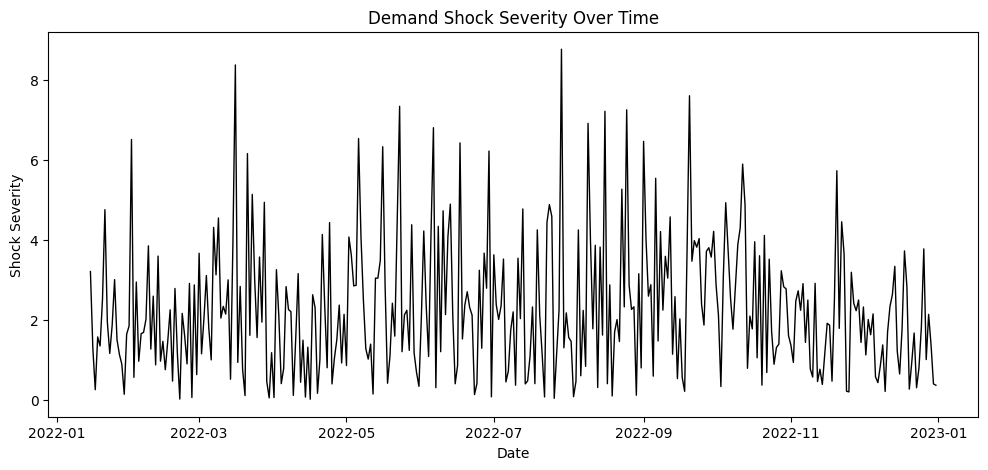

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["shock_severity"], color="black", linewidth=1)
plt.title("Demand Shock Severity Over Time")
plt.xlabel("Date")
plt.ylabel("Shock Severity")
plt.show()


In [20]:
df.sort_values("shock_severity", ascending=False)[
    ["demand", "shock_cause", "shock_severity"]
].head(10)


,demand,shock_cause,shock_severity
date,,,
2022-07-29,78.077134,Trend Shift,8.759980
2022-03-16,55.231219,Trend Shift,8.367153
2022-09-20,48.799072,Trend Shift,7.595909
2022-05-23,61.560992,Seasonal Volatility,7.332590
2022-08-25,53.285180,Seasonal Volatility,7.245274
2022-08-16,57.341976,Seasonal Volatility,7.208530
2022-08-09,71.237656,Seasonal Volatility,6.906753
2022-06-06,74.570244,Normal Variation,6.797658
2022-05-06,77.327562,Trend Shift,6.526258
